In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import csv

In [76]:
def toRange(arr, min, max):
    return arr*(max-min)+min;

def randInRange(min, max, shape = 1):
    num = np.random.random(shape)
    return num*(max-min)+min;

In [77]:
def readCsvNpArray(filename):
    data = np.genfromtxt(filename, delimiter=';')
    return data


In [78]:
trainSet = readCsvNpArray('Tabela_RNA_TREINO.csv')
trainSet

array([[2.3976, 1.5328, 1.9044, 1.1937, 2.4184, 1.8649, 1.    ],
       [2.3936, 1.4804, 1.9907, 1.2732, 2.2719, 1.811 , 1.    ],
       [2.288 , 1.4585, 1.9867, 1.2451, 2.3389, 1.8099, 1.    ],
       [2.2904, 1.4766, 1.8876, 1.2706, 2.2966, 1.7744, 1.    ],
       [1.1201, 0.0587, 1.3154, 5.3783, 3.1849, 2.4276, 2.    ],
       [0.9913, 0.1524, 1.27  , 5.3808, 3.0714, 2.3331, 2.    ],
       [1.0915, 0.1881, 1.1387, 5.3701, 3.2561, 2.3383, 2.    ],
       [1.0535, 0.1229, 1.2743, 5.3226, 3.095 , 2.3193, 2.    ],
       [1.4871, 2.3448, 0.9918, 2.316 , 1.6783, 5.085 , 3.    ],
       [1.3312, 2.2553, 0.9618, 2.4702, 1.7272, 5.0645, 3.    ],
       [1.3646, 2.2945, 1.0562, 2.4763, 1.8051, 5.147 , 3.    ],
       [1.4392, 2.2296, 1.1278, 2.423 , 1.7259, 5.0876, 3.    ],
       [2.9364, 1.5233, 4.6109, 1.316 , 4.27  , 6.8749, 4.    ],
       [2.9034, 1.464 , 4.6061, 1.4598, 4.2912, 6.9142, 4.    ],
       [3.0181, 1.4918, 4.7051, 1.3521, 4.2623, 6.7966, 4.    ],
       [2.9374, 1.4896, 4

In [79]:
nIns = trainSet.shape[1]-1
nIns

targets = np.unique(trainSet[:,nIns])
targets

nOuts = targets.shape[0]
nOuts

4

In [80]:
# 
# plt.plot(self.weights[:,0],self.weights[:,1], color='black')
# plt.title("W1 x W2")
# plt.plot(inputs[:,0], inputs[:,1], 'o', color='black');
# plt.show()

In [81]:
def getTarget(arr):
    if(len(arr.shape) == 2):
        return arr[:,arr.shape[1]-1]
    return arr[arr.shape[0]-1]

def getInputs(arr):
    if(len(arr.shape) == 2):
        return arr[:,0:arr.shape[1]-1]
    else:
        return arr[0:arr.shape[0]-1]

In [82]:
ts = getTarget(trainSet)
ts

array([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4.])

In [83]:
colors = {
    1:'blue',
    2:'darkred',
    3:'green',
    4:'violet'
}
centroideColors = {
    1:'cyan',
    2:'red',
    3:'limegreen',
    4:'deeppink'
}
def getColor(target):
    return colors[target]

getColorNpArray = np.vectorize(getColor)

In [84]:
class DataClass(object):

    def __init__(self, target, classData):
        self.data = classData
        self.inputs = getInputs(classData)
        self.target = target
        self.calcMeans()
        
    def calcMeans(self):
        self.means = getInputs(self.data).mean(0)

In [85]:
def clusterClasses(mtx, targets):
    classes = {}
    for t in targets:
        classes[t] = []
    
    for inputArr in mtx:
        t = getTarget(inputArr)
        classes[t].append(inputArr)
        
    for t in targets:
        classes[t] = DataClass(t, np.array(classes[t]))
#     print(classes[1.0].data)
    return classes

In [86]:
# getTarget(trainSet[0])
# trainSet[0]
# getInputs(trainSet[0])

In [87]:
classes = clusterClasses(trainSet, targets)
# classes
classes[2].data

array([[1.1201, 0.0587, 1.3154, 5.3783, 3.1849, 2.4276, 2.    ],
       [0.9913, 0.1524, 1.27  , 5.3808, 3.0714, 2.3331, 2.    ],
       [1.0915, 0.1881, 1.1387, 5.3701, 3.2561, 2.3383, 2.    ],
       [1.0535, 0.1229, 1.2743, 5.3226, 3.095 , 2.3193, 2.    ]])

In [88]:
trainSet

array([[2.3976, 1.5328, 1.9044, 1.1937, 2.4184, 1.8649, 1.    ],
       [2.3936, 1.4804, 1.9907, 1.2732, 2.2719, 1.811 , 1.    ],
       [2.288 , 1.4585, 1.9867, 1.2451, 2.3389, 1.8099, 1.    ],
       [2.2904, 1.4766, 1.8876, 1.2706, 2.2966, 1.7744, 1.    ],
       [1.1201, 0.0587, 1.3154, 5.3783, 3.1849, 2.4276, 2.    ],
       [0.9913, 0.1524, 1.27  , 5.3808, 3.0714, 2.3331, 2.    ],
       [1.0915, 0.1881, 1.1387, 5.3701, 3.2561, 2.3383, 2.    ],
       [1.0535, 0.1229, 1.2743, 5.3226, 3.095 , 2.3193, 2.    ],
       [1.4871, 2.3448, 0.9918, 2.316 , 1.6783, 5.085 , 3.    ],
       [1.3312, 2.2553, 0.9618, 2.4702, 1.7272, 5.0645, 3.    ],
       [1.3646, 2.2945, 1.0562, 2.4763, 1.8051, 5.147 , 3.    ],
       [1.4392, 2.2296, 1.1278, 2.423 , 1.7259, 5.0876, 3.    ],
       [2.9364, 1.5233, 4.6109, 1.316 , 4.27  , 6.8749, 4.    ],
       [2.9034, 1.464 , 4.6061, 1.4598, 4.2912, 6.9142, 4.    ],
       [3.0181, 1.4918, 4.7051, 1.3521, 4.2623, 6.7966, 4.    ],
       [2.9374, 1.4896, 4

In [147]:
class LVQ(object):

    def __init__(self, nIns, nOuts, learningRate, maxEpoch):
        self.nIns = nIns
        self.nOuts = nOuts
        # matriz de pesos tranposta.
#         self.weights = toRange(np.random.rand(nOuts, nIns),1,-1)
        self.learningRate = learningRate
        self.maxEpoch = maxEpoch
        
    def initWeights(self, classes):
        self.weights = np.empty([nOuts, nIns])
        for i in range(self.nOuts):
            self.weights[i] = classes[i+1].means.copy()
        self.weights = toRange(np.random.rand(nOuts, nIns),6,0)
        
    def calcDist(self, x, j):
        wj = self.weights[j]
        distances = (wj-x)**2
        total_dist = np.sum(distances)
        return total_dist
        
    def getNearestUnit(self, x):
        jmin = 0
        distMin = self.calcDist(x, jmin)
        
        for j in range(self.nOuts):
            dist = self.calcDist(x, j)
            if dist < distMin:
                distMin = dist
                jmin = j
        return jmin
        
    def train(self, inputsAndT, targets, classes):
        self.epoch = 0
        self.targets = targets
        if self.epoch == 0:
                self.showGraphs(classes)
        
        while self.epoch <= self.maxEpoch:
            np.random.shuffle(inputsAndT)
            for xAndT in inputsAndT:
                x = getInputs(xAndT)
#                 print('x')
#                 print(x)
                tx = getTarget(xAndT)
                jmin = self.getNearestUnit(x)
                self.updateWeights(jmin,x, tx)
                    
            self.updateLearningRate()
            if self.epoch%10 == 0:
                self.showGraphs(classes)
            self.epoch+=1
            
    def classify(self, inputs):
        predictedTargets = np.empty(inputs.shape[0])
        
        for i in range(len(inputs)):
            x = inputs[i]
            jmin = self.getNearestUnit(x)
            predictedTargets[i] = self.targets[jmin]
        return predictedTargets
    
    def classifyAndCompleteMtx(self, inputs):
        predictedTargets = self.classify(inputs)
        completeMtx = np.c_[testSet,predictedTargets]
        predictedClasses = clusterClasses(completeMtx, targets)
        self.showGraphs(predictedClasses)
        return completeMtx
        
             
    def updateWeights(self, j, x, tx):
        wOld = self.weights[j]
        t = self.targets[j]
        # se target da unidade/neurônio for o mesmo do target da entrada tx
#         print('tx '+ str(tx) + ' t '+ str(t))
        if t == tx:
#             print('Igual')
            self.weights[j] = wOld + self.learningRate*(x - wOld)
        else:
#             print('Dif')
            self.weights[j] = wOld - self.learningRate*(x - wOld)
    
    def updateLearningRate(self):
#         print('learningRate')
#         print(self.learningRate)
#         self.learningRate = self.learningRate - 0.0049
        self.learningRate = self.learningRate * 0.96163508
#         self.learningRate = self.learningRate - 0.00049
        
    def showGraphs(self, classes):
        print('Epoch')
        print(self.epoch)        
        for i in range(len(self.targets)):
            t = self.targets[i]
            print('t '+ str(t))
#             print('self.weights ')
#             print(self.weights[i,:])
#             print('classes[t].inputs ')
#             print(classes[t].inputs)
            plt.plot(self.weights[i,:], color=centroideColors[t])
            inputs = classes[t].inputs
            for inp in inputs:
                plt.plot(inp, color=colors[t], linestyle='dashed');
                
            plt.title("Target "+ str(t) + " - X1 a X6 ") 
        plt.show()

Epoch
0
t 1.0
t 2.0
t 3.0
t 4.0


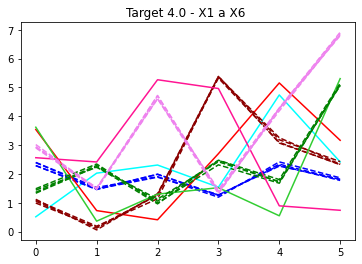

Epoch
0
t 1.0
t 2.0
t 3.0
t 4.0


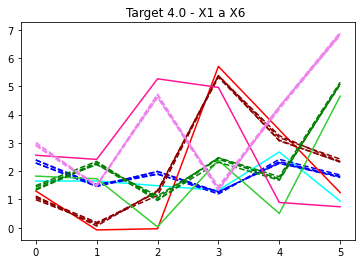

Epoch
10
t 1.0
t 2.0
t 3.0
t 4.0


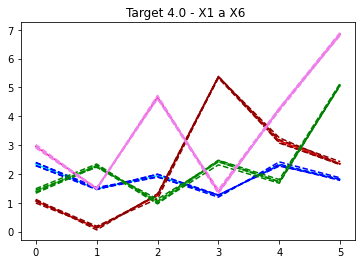

Epoch
20
t 1.0
t 2.0
t 3.0
t 4.0


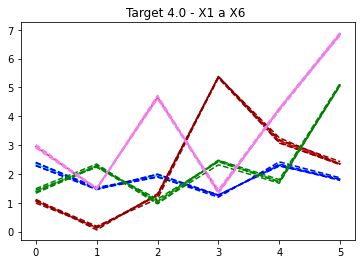

Epoch
30
t 1.0
t 2.0
t 3.0
t 4.0


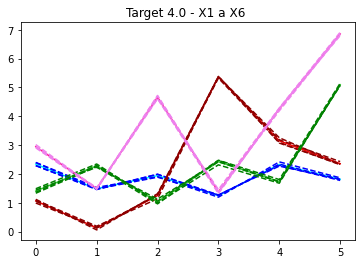

Epoch
40
t 1.0
t 2.0
t 3.0
t 4.0


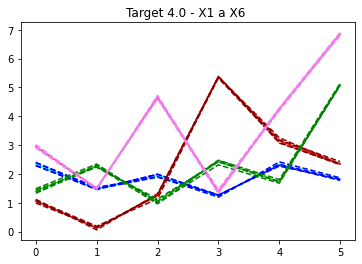

Epoch
50
t 1.0
t 2.0
t 3.0
t 4.0


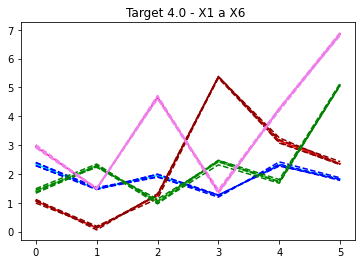

Epoch
60
t 1.0
t 2.0
t 3.0
t 4.0


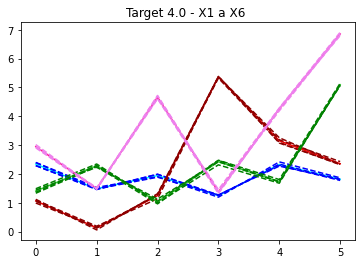

Epoch
70
t 1.0
t 2.0
t 3.0
t 4.0


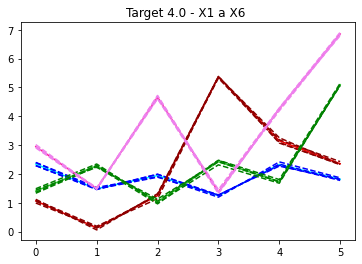

Epoch
80
t 1.0
t 2.0
t 3.0
t 4.0


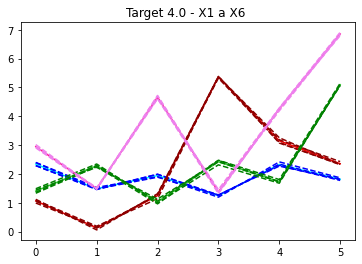

Epoch
90
t 1.0
t 2.0
t 3.0
t 4.0


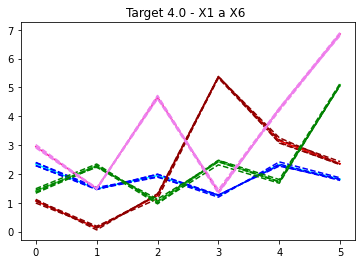

Epoch
100
t 1.0
t 2.0
t 3.0
t 4.0


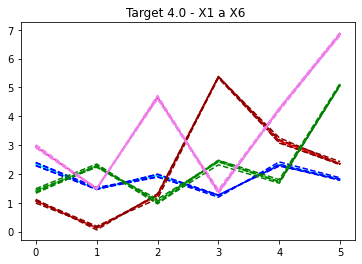

In [152]:
lvq  =  LVQ(nIns, nOuts, 0.3, 100)
lvq.initWeights(classes)
lvq.train(trainSet, targets, classes)
# lvq.weights

In [153]:
testSet = readCsvNpArray('Tabela_RNA_TESTE.csv')
testSet

array([[2.9817, 1.5656, 4.8391, 1.4311, 4.1916, 6.9718],
       [1.5537, 2.2615, 1.3169, 2.5873, 1.757 , 5.0958],
       [1.224 , 0.2445, 1.3595, 5.4192, 3.2027, 2.5675],
       [2.5828, 1.5146, 2.1119, 1.2859, 2.3414, 1.8695],
       [2.4168, 1.4857, 1.8959, 1.3013, 2.45  , 1.7868],
       [1.0604, 0.2276, 1.2806, 5.4732, 3.2133, 2.4839],
       [1.5246, 2.4254, 1.1353, 2.5325, 1.7569, 5.264 ],
       [3.0565, 1.6259, 4.7743, 1.3654, 4.2904, 6.9808]])

In [154]:
predictedTargets = lvq.classify(testSet)
predictedTargets

array([4., 3., 2., 1., 1., 2., 3., 4.])

Epoch
101
t 1.0
t 2.0
t 3.0
t 4.0


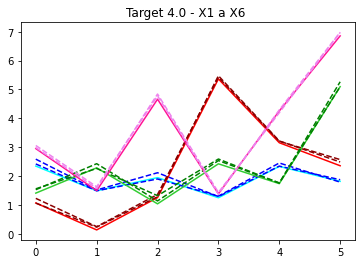

In [157]:
testSetWithTargets = lvq.classifyAndCompleteMtx(testSet)

In [158]:
testSetWithTargets

array([[2.9817, 1.5656, 4.8391, 1.4311, 4.1916, 6.9718, 4.    ],
       [1.5537, 2.2615, 1.3169, 2.5873, 1.757 , 5.0958, 3.    ],
       [1.224 , 0.2445, 1.3595, 5.4192, 3.2027, 2.5675, 2.    ],
       [2.5828, 1.5146, 2.1119, 1.2859, 2.3414, 1.8695, 1.    ],
       [2.4168, 1.4857, 1.8959, 1.3013, 2.45  , 1.7868, 1.    ],
       [1.0604, 0.2276, 1.2806, 5.4732, 3.2133, 2.4839, 2.    ],
       [1.5246, 2.4254, 1.1353, 2.5325, 1.7569, 5.264 , 3.    ],
       [3.0565, 1.6259, 4.7743, 1.3654, 4.2904, 6.9808, 4.    ]])